# Optimització - Linear regression

In [1]:
# Comprovem que autograd estigui instal·lat
if __name__ == '__main__':
    try:
        import autograd
    except:
        print('No s\'ha detectat autograd instal·lat')
        if input('Vols instalar autograd? [s/n]').strip().lower() == 's':
            !pip3 install --user -U autograd
            !pip install --user -U autograd
        else:
            print('Abans de continuar instal·la autograd')

In [2]:
from plot_utils import *

import autograd.numpy as np
from autograd import elementwise_grad as grad, value_and_grad
import matplotlib.pyplot as plt
import pandas as pd
import random

if __name__ == '__main__':
    from IPython.display import display
    
    %matplotlib inline

In [3]:
# Per utilitzar aquesta llibreria cal tenir instalar el paquet tqdm
from tqdm import tqdm_notebook

def human_format(num):
    """
    Funció auxiliar per formatar els nombres

    100    -> 100.00
    2100   -> 2.10K
    342100 -> 342.10K
    etc.    
    
    :param num: Nombre a formatar
    :return: String amb el nombre formatat
    """
    prefixes = ['', 'K', 'M', 'G', 'T', 'P']
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.2f%s' % (num, prefixes[magnitude])

# Punt 13: alpha variable
def gradient_descend_auto(f, x0, alpha_0=10, eps=1e-6, max_iter=1000, print_iters=1000):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient, és a dir,
    donat un punt inicial, la funció de la que calculem el gradient i el pas, 
    intenta trobar el mínim de la funció seguint el gradient en direcció oposada.
    
    Normalitzant el gradient.
    
    Pel criteri d'aturada, considerarem si ||x^{k+1} - x^k|| < eps, és a dir
    si la norma de la diferència és més petita que eps.
    
    Cada print_iters cal mostrar el resultat actual en la següent forma:
        "{}/{:.2f}".format(human_format(itr), float(valor_de_f_en_x))
    És dir, un missatge que inclogui la iteració i el valor de f en el punt
    
    :param f: Funció a minimitzar
    :param x0: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_epochs: Iteracions màximes a realitzar
    :param print_iters: Numero d'iteracions per printar resultats
    :return: La funció retornarà el punt on es troba el mínim
    """
    grad_f = grad(f)
    iters = 0
    x_new = x0
    f_new = f(x_new)
    while iters < max_iter:
        alpha = alpha_0
        x_last = x_new
        f_last = f_new
        grad_new = grad_f(x_last)
        #grad_new = grad_new/np.linalg.norm(grad_new)
        x_new = x_last - alpha * grad_new
        f_new = f(x_new)
        while f_new > f_last:
            alpha /= 2
            x_new = x_last - alpha * grad_new
            f_new = f(x_new)
        # Creo aleatorietat per veure si puc baixar més ràpid
        x_test = np.array([[np.random.uniform(i-5, i+5) for i in range(w0.size)]])
        f_test = f(x_test)
        if f_test < f_new:
            f_new = f_test
            x_new = x_test
        iters += 1
        if iters % print_iters == 0:
            print("{}/{:.3f}".format(human_format(iters), float(f(x_new))))
        if np.linalg.norm(x_last - x_new) < eps:
            print("{}/{:.3f}".format(human_format(iters), float(f(x_new))))
            break
    return x_new

In [5]:
def add_bias(X):
    """
    Funció que donada el vector x crea el vector x', afegint una columna d'1's al davant.
    Per exemple, si X és
        [
            [1, 2, 5, 1, 5, 7],
            [9, 4, 2, 4, 6, 1],
            ...
            [5, 3, 1, 4, 5, 7]
        ]
    El retorn de la funció serà la matriu
        [
            [1, 1, 2, 5, 1, 5, 7],
            [1, 9, 4, 2, 4, 6, 1],
            ...
            [1, 5, 3, 1, 4, 5, 7]
        ]
    
    *Sense bucles*
    
    :param X: Matriu on cada fila és una dada i cada columna una característica
    :return: Mateixa matriu amb una columna de 1s davant
    """
    # Agafo la forma de la matriu donada, i creo una matriu d'uns amb les mateixes files
    # pero d'1 columna. Finalment, retorno les la matriu amb la columna d'1s davant.
    n, m = X.shape
    X1 = np.ones((n, 1))
    return np.hstack((X1, X))

def linear_regression(x, w):
    """
    Donat un punt i els parameters del model prediu el valor, implementant el càlcul de
    la regressió lineal:
            y' = w0 * x0 + w1 * x1 + ... + xp * wp
            
    *Sense bucles*
    
    :param x: Matriu de dades i features, on la primera columna son 1s, té per shape [NDades, NFeatures]
    :param w: Matriu de paràmetres, té per shape [1, NFeatures]
    :return: Vector de tamany [NDades] amb la predicció y' per a cada punt
    """
    # Tal i com ens proporcionen les dades, és equivalent a fer
    # el producte d'una matriu (x) per un vector (w[0].T)
    return np.dot(x, w[0].T)

def loss(y_true, y_pred):
    """
    Funció que calcula la diferència entre la solució real i la predita mitjançant
    distància euclidea
        ||y_true - y_pred||
        
    *Sense bucles*
    
    :param y_true: Valor real de la Y
    :param y_pred: Valor predit y' per a cada corresponent y
    :return: Error de la predicció
    """
    return np.linalg.norm(y_true - y_pred)

def model(w, x, y):
    """
    Funció que genera el model que volem optimizar, calculant l'error d'una
    predicció amb els pàrametres i valors passats
    
    :param w: Paràmetres del model
    :param x: Dades del model
    :param y: Valors a predir
    :return: Error (loss) de les preddiccions
    """
    return loss(y, linear_regression(x, w))

# Airbnb: dades reals (a baixa escala)

### Airbnb Dataset

Les dades amb les que treballarem en aquesta pràctica són dades reals recopilades per *Airbnb*. 
Aquestes analitzen la informació disponible sobre els llistats d’Airbnb d’una ciutat, proporcionant filtres i mètriques clau perquè pugueu veure com Airbnb s’utilitza per competir amb el mercat d’habitatges residencials.

Amb aquestes dades podrieu fer preguntes fonamentals sobre Airbnb a qualsevol barri o a tota la ciutat. Preguntes com:

- "Quants fitxes hi ha al meu barri i on són?"
- "Quantes cases i apartaments es lloguen amb freqüència a turistes i no a residents a llarg termini?"
- "Quant costen els hostes des del lloguer als turistes (compareu-ho amb els lloguers a llarg termini)?"
- "Quins amfitrions tenen una empresa amb diversos llistats i on?"

Les dades inclou dades com:
- Quantitat de nits que es lloga una vivenda a l'any.
- Estades mínimes.
- Quantes habitacions es lloguen en un edifici.
- Nombre d’ocupats permesos en un lloguer.

En el nostre cas, **volem predir el preu de la vivenda utilitzant el resum donat.**

In [6]:
import zipfile
from os.path import join, dirname

def locate(*path):
    base = globals().get('__file__', '.')
    return join(dirname(base), *path)

def unzip(file):
    zip_ref = zipfile.ZipFile(locate(file), 'r')
    zip_ref.extractall(locate('data'))
    zip_ref.close()

def clean(s):
    try:
        s = s.replace('O', '0').replace(',', '').replace('$', '')
        return np.float(s.split()[0])
    except:
        return np.nan

def tobool(s):
    return s == 't'

if __name__ == '__main__':
    def open_airbnb_data(file):
        unzip(f'{file}.zip')
        
        return pd.read_csv(f'data/{file}.csv',
            converters={
                'zipcode': clean,
                'price': clean,
                'weekly_price': clean,
                'monthly_price': clean,
                'host_is_superhost': tobool,
                'host_identity_verified': tobool,
                'host_has_profile_pic': tobool,
                'is_location_exact': tobool,
                'has_availability': tobool,
                'requires_license': tobool,
                'instant_bookable': tobool,
                'is_business_travel_ready': tobool,
                'require_guest_profile_picture': tobool,
                'require_guest_phone_verification': tobool,
                'summary': lambda s: s or ''
            }
        )
    
    
    df_airbnb = open_airbnb_data('data_public')

In [7]:
if __name__ == '__main__':
    display(df_airbnb.head())
    print(df_airbnb.shape)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,18666,https://www.airbnb.com/rooms/18666,20190917034823,2019-09-17,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",none,...,False,False,flexible,False,False,31,31,0,0,0.02
1,1,18674,https://www.airbnb.com/rooms/18674,20190917034823,2019-09-17,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,none,...,True,False,strict_14_with_grace_period,False,False,31,31,0,0,0.21
2,2,21605,https://www.airbnb.com/rooms/21605,20190917034823,2019-09-17,Nice and sunny duble room,"The flat is in Poblenou district, and the room...","L'apartament està al barri de Poblenou, i l'ha...","The flat is in Poblenou district, and the room...",none,...,False,False,moderate,False,False,2,0,2,0,3.05
3,3,23197,https://www.airbnb.com/rooms/23197,20190917034823,2019-09-17,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,none,...,True,False,strict_14_with_grace_period,False,True,2,2,0,0,0.47
4,4,25786,https://www.airbnb.com/rooms/25786,20190917034823,2019-09-17,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Room available for rent.- PEDRO PEREZ. Share...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,none,...,True,False,strict_14_with_grace_period,True,True,1,0,1,0,2.29


(18904, 107)


In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')

def tokenize(df):
    """
    Funció que donat el dataframe amb les dades d'Airbnb retorna
    una llista de llistes on cada subllista conté les paraules
    tokenitzades del text extret de la columna "summary".
    
    Per facilitar la feina de la tokenització podeu utilizar les stopwords 
    que venen amb la llibreria nltk i la funció word_tokenize.
    
    :param df: DataFrame que conté el dataset
    :return : Llista de llistes amb la informació indicada
    """
    # Creem set de paraules que no afegirem (puntuació, anglès, espanyol i números)
    punctuation = set(string.punctuation).union({'``', "''", '...', '’'})
    stop_words = set(stopwords.words('english')).union(set(stopwords.words('spanish')), {"'s"})
    numbers = set([str(x) for x in range(100)])
    dirty_words = stop_words.union(punctuation, numbers)
    # Creem la llista de llistes amb les paraules útils
    
    #MODIFICACIO PUNT 2
    descriptions = descriptions = (df['summary'].map(str) + ' ' + df['amenities'].map(str) + ' ' + df['host_verifications'].map(str)).tolist()
    
    filtered_descriptions = [[w.lower() for w in word_tokenize(description) if w.lower() not in dirty_words] \
                             for description in descriptions]

    return filtered_descriptions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from collections import Counter
def most_common(tokens, n):
    """
    Funció que retorna les n parales més frequents a partir dels tokens
    
    :param tokens: Tokens obtinguts amb `tokenize`
    :param n: Int, nombre d'elements que es demanen retornar
    :return: Llista amb el top n elements
    """
    #Mirar que no retorni numeros
    
    flatList = [item for elem in tokens for item in elem]
    counts = Counter(flatList)
    return [w for w, m in counts.most_common(n)]

def check_word(text, word):
    """
    Funció que retorna les n parales més frequents a partir dels tokens
    
    :param tokens: Tokens obtinguts amb `tokenize`
    :param n: Int, nombre d'elements que es demanen retornar
    :return: Llista amb el top n elements
    """
    #Mirar que no retorni numeros
    
    counts = Counter(text)
    return counts[word]

In [10]:
print(most_common(tokenize(df_airbnb.head(5)), 10))
print(check_word(tokenize(df_airbnb.head(5))[0], 'dryerp'))

['parking', 'friendly', 'dryer', 'tv', 'wifi', 'heating', 'paid', 'premises', 'stairs', 'steps']
0


In [14]:
df = df_airbnb.head(5)
tokens = tokenize(df)
most = most_common(tokens, 5)
print(most)
print(get_features(df, tokens, most))
# Doble bucle, 100 apartments, 100 paraules: 3.31 ms ± 22.5 µs
# Doble bucle, tots apartments, 100 paraules: 735 ms ± 2.5 ms
# List comprehension, 100 apartments, 100 paraules: 32.6 ms ± 123 µs
print(tokens)

['parking', 'friendly', 'dryer', 'tv', 'wifi']
[[  2.        1.        2.        1.        1.        0.       75.
   41.40889   2.18555  10.        2.     ]
 [  2.        2.        1.        1.        1.        0.       60.
   41.4042    2.17306   9.        2.     ]
 [  2.        2.        2.        2.        2.        0.      108.
   41.4056    2.19821   9.        1.     ]
 [  2.        2.        2.        1.        1.        1.       60.
   41.41203   2.22114   9.        3.     ]
 [  0.        1.        1.        1.        1.        1.       60.
   41.40145   2.15645  10.        1.     ]]
[['apartment', 'located', 'near', 'plaza', 'glorias', 'second-hand', 'market', 'encants', 'accommodation', 'also', 'close', 'national', 'theatre', 'catalunya', 'agbar', 'tower', 'become', 'one', 'new', 'symbols', 'barcelona', 'licence', 'number', 'hutb-', 'phone', 'number', 'hidden', 'tv', 'internet', 'wifi', 'air', 'conditioning', 'wheelchair', 'accessible', 'kitchen', 'elevator', 'free', 'street',

El resultat serà un *np.array* (no necessàriament amb aquest valors):

```python
np.array([
    np.array([0, 1, 1, 0, ...]), # 1r Summary
    np.array([0, 1, 1, 1, ...]), # 2n Summary
    ...
])
```

### Partició de dades

En l'aprenentatge automàtic, una tasca habitual és l'estudi i la construcció d'algorismes que poden aprendre i fer prediccions sobre dades. Aquests algoritmes funcionen fent prediccions o decisions basades en dades, mitjançant la creació d'un model matemàtic a partir de dades d'entrada.

Les dades que s’utilitzen per construir el model final normalment provenen de múltiples conjunts de dades. En particular, dos conjunts de dades s’utilitzen habitualment en diferents etapes de la creació del model: dades d'entrenament (train) i de prova (test).

El model s’adapta inicialment a un conjunt de dades d’entrenament, que és un conjunt d’exemples que s’utilitzen per ajustar els paràmetres (per exemple, pesos del model de regressió linal) del model. 
El model es forma en el **conjunt de dades d’entrenament** que sovint consisteix en parells d’un vector d’entrada (o escalar) i el vector de sortida corresponent (o escalar), que es denomina habitualment com a objectiu (o etiqueta). El model actual s'executa amb el conjunt de dades d'entrenament i produeix un resultat, que es compara després amb l'objectiu, per a cada vector d'entrada del conjunt de dades d'entrenament. A partir del resultat de la comparació i de l'algorisme d'aprenentatge específic que s'utilitza, s'ajusten els paràmetres del model. L'adaptació del model pot incloure selecció de variables i estimació de paràmetres.

El **conjunt de dades de prova** és un conjunt de dades utilitzat per proporcionar una avaluació imparcial d’un model. Si les dades de prova no s’han utilitzat mai durant l'entrenament, el resultats representa el comportament esperat del model.

A continuació heu d'implementar la funció *split* que crea aquesta partició de dades.

In [15]:
from sklearn.model_selection import train_test_split

def split(X, Y, train_percent, random_seed=None):
    """
    Divideix el conjunt de dades en dos subconjunts aleatoris diferents, sense
    intersecció.
    La divisió es fa conjuntament en X i Y, és a dir, donat una dada x de X,
    la seva corresponent y en Y es troba en el mateix conjunt
    X = [[1, 2, 3], [2, 3, 1], ..., [1, 4, 5]]
    Y = [1, 2, ..., 5]
    
    Train: X = [[1, 2, 3], [1, 4, 5]]; Y = [1, 5]
    Test:  X = [[2, 3, 1]]; Y = [2]
    
    :param X: Dades del model
    :param Y: Corresponents valors a predir
    :param train_percent: Percentatge entre 0 i 1, indicant el nombre
        d'elements que contindrà el conjunt de train
    :param random_seed: En cas de que sigui necessari (no és obligatori fer-ho servir), 
        per fixar el comporament de random
    :return: Una llista/tupla que contingui, en aquest ordre, 
        * Conjunt train X [NDadesTrain, NFeatures]
        * Conjunt test X [NDadesTest, NFeatures]
        * Conjunt train Y [NDadesTrain]
        * Conjunt test Y [NDadesTest]
    """

    train_X = []
    test_X = []
    train_Y = []
    test_Y = []
    long = len(X)
    integers = list(range(long)) #Fem una llista d'enters de mida len(X) i els movem aleatoriament.
    random.shuffle(integers) #Els train_num primers seran per train, els altres per test.
    train_num = int(long * train_percent)
    for i in range(train_num):
        train_X.append(X[integers[i]])
        train_Y.append(Y[integers[i]])
    for i in range(long-train_num):
        test_X.append(X[integers[i+train_num]])
        test_Y.append(Y[integers[i+train_num]])
    
    return train_test_split(X,Y, train_size = 0.80)
    #return [train_X, test_X, train_Y, test_Y]

In [16]:
def get_features(df, tokens, most_common_tokens):
    """
    Funció que retorna un vector de 0 i 1 per cadascuna de les entrades del dataset,
    en funció de si les paraules comunes es troben o no entre els tokens.
    
    Per a cada dada, mirarem si quines de les paraules comunes apareixen entre els tokens,
    posant un 1 a les que sí i un 0 a les que no.
    
    Cada dada tindrà, a més dels 0/1 corresponents a les N paraules més comunes, una columna
    més, corresponent a la columna 'require_guest_phone_verification' de 'df'. Per tant,
    el retorn per cada dada serà
    [0, 1, .........., 0,         1         ]
    |N tokens més comuns, columna addicional|
    
    *Únicament es permeten bucles pel càlcul dels 0/1s dels tokens*
    
    :param df: DataFrame que conté el dataset
    :param tokens: Tokens per cada entrada del dataset
    :param most_common_tokens: N tokens més comuns
    :return : Matriu de característiques de cada entrada del dataset, incloent els
        0/1s dels tokens i la columna 'require_guest_phone_verification'
    """
    
    features = np.zeros((df.shape[0], len(most_common_tokens)))
    for i in range(features.shape[0]):
        for j in range(features.shape[1]):
            features[i,j] = check_word(tokens[i], most_common_tokens[j])
    # Triga un 22% menys afegint la ultima columna així
    phone = np.array([np.array(df['require_guest_phone_verification'], dtype='float')]).T
    newc = np.array([np.array(df['square_feet'], dtype='float')]).T
    newc[np.isnan(newc)] = 60.
    loc = np.array([np.array(df['review_scores_location'], dtype='float')]).T
    loc[np.isnan(loc)] = 5.
    guests = np.array([np.array(df['guests_included'], dtype='float')]).T
    guests[np.isnan(guests)] = 2
    
    lat = np.array([np.array(df['latitude'], dtype='float')]).T
    lon = np.array([np.array(df['longitude'], dtype='float')]).T
    features = np.hstack((features, phone, newc, lat, lon, loc, guests))  
    
    return features

Abans de generar els conjunts d'entrenament i prova cal generar els vectors que representen cada entrada de les dades.

In [168]:
if __name__ == '__main__':
    tok = tokenize(df_airbnb)
    print('Tokenized')
    com = most_common(tok, 100)
    print('Common done')
    

Tokenized
Common done


In [169]:
feats = get_features(df_airbnb, tok, com)

In [170]:
if __name__ == '__main__':
    # Valors amb els que predirem el preu de la vivenda
    X = add_bias(feats)

    # Valors reals de la vivenda
    Y = df_airbnb['price'].values

    # Partim en train i test
    X_train, X_test, Y_train, Y_test = split(X, Y, train_percent=0.80)

C:\Users\marti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [171]:
if __name__ == '__main__':
    # Parametres per defecte del model
    w0 = np.random.normal(1,1,size=(1, X.shape[1]))
    
    print(X_train)

    # Optimització del model sobre train
    wf = gradient_descend_auto(lambda w: model(w, X_train, Y_train), w0, 100, max_iter=5000, print_iters=1000) # ~ @2min

    

[[ 1.       2.       2.      ...  2.15172 10.       2.     ]
 [ 1.       2.       1.      ...  2.19186  5.       3.     ]
 [ 1.       1.       1.      ...  2.16902  5.       1.     ]
 ...
 [ 1.       2.       2.      ...  2.16647 10.       1.     ]
 [ 1.       2.       2.      ...  2.14664  5.       1.     ]
 [ 1.       1.       0.      ...  2.11732 10.       1.     ]]
1.00K/59213.210
2.00K/58788.977
3.00K/58527.702
4.00K/58345.447
5.00K/58205.378
6.00K/58090.073
7.00K/57990.730
8.00K/57902.611
9.00K/57822.977
10.00K/57750.073
11.00K/57682.859
12.00K/57620.420
13.00K/57562.206
14.00K/57507.697
15.00K/57456.497
16.00K/57408.277
17.00K/57362.767
18.00K/57319.687
19.00K/57278.862
20.00K/57240.075
21.00K/57203.191
22.00K/57168.047
23.00K/57134.534
24.00K/57102.495
25.00K/57071.863
26.00K/57042.531
27.00K/57014.430
28.00K/56987.428
29.00K/56961.511
30.00K/56936.595
31.00K/56912.620
32.00K/56889.541
33.00K/56867.286
34.00K/56845.811
35.00K/56825.102
36.00K/56805.089
37.00K/56785.743
38.00K/5

In [172]:
w0 = np.copy(wf)
wbest = np.copy(wf)

-270.27492752854954 959.4909373571605
Mean error: 131.26


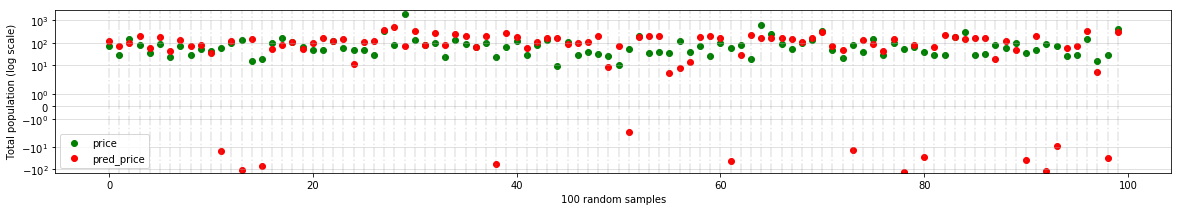

In [173]:
if __name__ == '__main__':
    # Realitzem la predicció sobre test
    y_pred = linear_regression(X_test, wf)
    print(y_pred.min(), y_pred.max())
    #y_pred[y_pred<6] = 100.
    # Mostrem únicament 100 dades en el gràfic
    size = 100
    sample = np.random.choice(X_test.shape[0], size=size, replace=False)

    # Mínima i màxima Y a mostrar en el gràfic
    miny = np.minimum(y_pred[sample].min(), Y_test[sample].min()) - 10
    maxy = np.maximum(y_pred[sample].max(), Y_test[sample].max()) + 1e3

    # Visualització de les dades originals i les prediccions
    plt.figure(figsize=(20, 3))
    plt.scatter(range(size), Y_test[sample], color='green', label = 'price')
    plt.scatter(range(size), y_pred[sample], color='red', label = 'pred_price')
    plt.xlabel('100 random samples')
    plt.ylabel('Total population (log scale)')
    plt.yscale('symlog')
    plt.ylim([miny, maxy])
    plt.grid(axis='y', which='minor', alpha=0.2)
    plt.grid(axis='y', which='major', alpha=0.3)
    plt.legend()

    for x in range(size):
        plt.plot((x, x), (miny, maxy), '-.', color='gray', alpha=0.2)

    print('Mean error: {:.2f}'.format(np.mean(np.abs(Y_test - y_pred))))

# Millores i Kaggle

### ** Dels següents punts és obligatori implementar-ne dos per la pràctica, fes-ho en noves cel·les al final del notebook, no modifiquis les anteriors.**
#### **Per Kaggle pots duplicar el notebook i implementar tants punts com vulguis.**

Cap de les implementacions que facis pot modificar la regressió lineal en sí mateixa (la funció `linear_regression`) de forma que:

* Tingui més paràmetres que la $w$ ja existent
* Afegeixi més complexitat al model

Dit això, es proposa:


**Martí: Imparells**

**Oscar: Parells**


1. Donat el tipus de dades, té sentit que la regressió lineal dongui nombres negatius? Compta si decideixes controlar-ho a nivell de la fòrmula de la regressió (vs a nivell dels valors predits), potser el model tendirà a modelar els outliers (valors fora del normal/mitja/distribució) enlloc dels elements representatius.

* Tokenitza i busca tokens més comuns no solament a `summary`, sinó també a les altres columnes que contenen text.

* Afegeix més features al vector X. El model s'entrena amb les característiques extretes de la columna `summary` i `require_guest_phone_verification`, però perque no fer-ne servir més?
> Tingues en compte que no pots agafar cap de les columnes de preu (`price`, `weekly_price`, `monthly_price`, `security_deposit`, `cleaning_fee` i `extra_people`), ja que en les dades de Kaggle no està disponible

* Segons quines dades agafis, és possible que els valors de la característiquis siguin molt dispars. Per exemple, una columna pot tenir de màxim 1 però una altra podria tenir 1000. Normalitza aquests valors de forma que tots tinguin el mateix màxim i mínim. Pots normalitzar també el vector a predir Y, sempre i quan ho tinguis en compte en les noves prediccions.

* La regressió lineal, com el nom indica, és un model lineal, i per tant està limitat amb el tipus de dades que pot representar. Per exemple, generalment, no pot modelar adequadament dades exponencials, logarístimiques, quadràtiques, etc. Això, però, es pot mitigar mitjançant les característiques que es passen al model. Per exemple, si l'entrada és $x$, podríem ampliar aquesta entrada a $(x, x^2)$, on la segona part és simplement cada una de les característiques al quadrat. D'igual forma, podríem ampliar indefinidament $(x, x^2, log(x), e^x, ...)$, però evidentment el cost computacional i el temps d'entrenament creixen, i la millora cada cop és més marginal, si n'hi ha.

* Filtra les dades per evitar utilitzar outliers, de forma que no afectin en l'entrenament.

* Fes una millor selecció de tokens, ens interessen totes les paraules? Tot i que no siguin stopwords, volem tots els números, símbols, etc.?

* Per regressió es poden triar múltiples funcions d'error. Aquí estem fent simplement la distància euclidea, però es pot estudiar l'ús d'altres com: Mean Squared Error, Mean Absolute Error, Huber Loss, d'entre altres. Algunes d'elles són més robustes contra outliers, d'altres més sensibles.

* Els paràmetres inicials es trien random segons una distribució normal $N(0, 1)$, són adequats donats els valors de les característiques i de l'output que esperem? Normalitzar tant $X$ com $Y$ pot ajudar a que ho siguin, en cas que no ho facis, aquests valors poden allargar/dificultar el procés.

* Selecciona un nombre diferent de tokens més comuns. Inicialment utilitzem 100, són masses/pocs? Compte amb el cost computacional.

* Hem utilitzat la forma binomial de bag of words, és a dir 0 o 1, però es podria mirar si implementar la multinomial (0-n, on n és el nombre d'aparicions), ajuda en l'entrenament.

* Bag of words és una forma bastant naive de tractar el text. Una millora, que no implica grans canvis en el codi, és implementar TF-IDF.

* A part d'intentar trobar una alpha òptima (en el sentit de temps inverit vs distància moguda), pots implementar una que aquest pas decaigui amb el temps. Per exemple, pots implementar una caiguda exponencial. Sigui $\alpha_0$ el pas inicial, $it$ la iteració actual, $0 < \beta < 1$ la caiguda que realitza i $\gamma > 0$ el nombre d'iteracions cada quan s'aplica
$$\alpha = \alpha_0 \cdot \beta ^ {\frac{it}{\gamma}}$$
El plot mostra el comportament al llarg de les iteracions. Aplicant una divisó entera enlloc de flotant, es pot aconseguir un efecte "escala" enlloc de continu.

In [ ]:
if __name__ == '__main__':
    alpha_0 = 1
    beta = 0.95
    gamma = 10000

    iters = np.arange(1e6)
    plt.figure(figsize=(20, 3))
    plt.plot(iters, alpha_0 * beta ** (iters / gamma), color='b')
    plt.plot(iters, alpha_0 * beta ** (iters // gamma), color='orange')

### Codi per Kaggle

Suposant que has trobat un model adequat a partir del teu split train/test, ara s'entrena un model igual (modifica el codi apropiadament) amb totes les dades.

Amb aquest model final, es prediu sobre el conjunt de dades de Kaggle i es guarda el resultat. Tingueu en compte que el resultat que us mostrarà Kaggle és **sobre un 30% de les totes les dades que envieu**. Si baseu tot el model en els nombres que us digui Kaggle, estareu cometent un greu error, doncs no generalitzarà al 70% restant. Per trobar el millor model i provar les diferents millores, utilitzeu el vostre split train/test.

https://www.kaggle.com/t/e5f6d1562dea41e68a53af9627646552

In [125]:
if __name__ == '__main__':
    # Obtenim les features de les dades de Kaggle
    df_kaggle = open_airbnb_data('data_kaggle')
    
    # Tokenitzem, agafant els més comuns que hem trobat abans
    tok_kaggle = tokenize(df_kaggle)
    feats_kaggle = get_features(df_kaggle, tok_kaggle, com)
    
    # Valors amb els que predirem el preu de la vivenda
    X_kaggle = add_bias(feats_kaggle)

In [129]:
if __name__ == '__main__':    
    # Entrenem el model, però ara amb totes les dades
    # Modifica, si cal, per tal d'utilitzar les millores que hagis implementat
    #w0 = np.random.normal(1,1,size=(1, X.shape[1]))
    wf_kaggle = gradient_descend_auto(lambda w: model(w, X, Y), w0, 100, max_iter=10000, print_iters=1000)    

    # Efectuem la predicció i guardem el resultat
    y_pred_test = linear_regression(X_kaggle, wf_kaggle)
    df_kaggle['pred_price'] = y_pred_test
    df_kaggle[['id', 'pred_price']].to_csv('submission.csv', index=None)

1.00K/61124.000
2.00K/61037.720
3.00K/60967.848
4.00K/60903.209
5.00K/60839.958
6.00K/60778.608
7.00K/60718.363
8.00K/60662.242
9.00K/60609.201
10.00K/60554.274


In [131]:
w0 = np.copy(wf_kaggle)

### Implementa a continuació dos dels punts anteriors

Copia, si fes falta, les funcions que necessitis i canvia'ls-hi el nom

In [ ]:
#Falta copiar-ne dos :>